# ANS 1 (a)

We calculate information gain of each attribute. Let S be a given data set.
Entropy(S) = -p * log(p) , where p = probability of playTennis | playTennis - {'yes','no'}
Entropy(S) =  - (9/14) * log2(9/14)- (5/14) * log2(5/14)
Entropy(S) = 0.940

IG(Date) = Entropy(S) - Entropy(Date)
                  = 0.94 - [  - 1*log2(1) - 1*log2(1) - 1*log2(1) - 1*log2(1) - 1*log2(1) - 1*log2(1)-1 * log2(1) - 1 * log2(1) - 1 * log2(1) - 1 * log2(1) - 1 * log2(1) - 1 * log2(1)-1*log2(1) - 1*log2(1)]
                  = 0.94

IG(outlook)         = Entropy(S) - (5/14)*Entropy(Sunny)- (4/14)*Entropy(Overcast)- (5/14)*Entropy(Rain)
                     = 0.94 - (5/14)*[-(3/5)*log2(3/5)-(2/5)*log2(2/5)]- (4/14)*[-(1)*log2(1)]- (5/14)*[-(3/5)*log2(3/5)
                       - (2/5)*log2(2/5)]
                     = 0.246

IG(Temparature)          = Entropy(S) - (4/14)*Entropy(hot)- (6/14)*Entropy(mild)- (4/14)*Entropy(cool)
                         = 0.94 - (4/14)*[-(2/4)*log2(2/4)-(2/4)*log2(2/4)]- (6/14)*[-(2/6)*log2(2/6)-(4/6)*log2(4/6)]-
                          (4/14)*[-(3/4)*log2(3/4) - (1/4)*log2(1/4)]
                         = 0.029

     IG(Humidity)     = Entropy(S) - (7/14)*Entropy(High)- (7/14)*Entropy(Normal)
                      = 0.94 - (7/14)*[-(4/7)*log2(4/7)-(3/7)*log2(3/7)]- (7/14)*[-(6/7)*log2(6/7)-(1/7)*log2(1/7)]
                      = 0.151

     IG(Wind)     = Entropy(S) - (8/14)*Entropy(Weak)- (6/14)*Entropy(Strong)
                  = 0.94 - (8/14)*[-(2/8)*log2(2/8)-(6/8)*log2(6/8)]- (6/14)*[-(3/6)*log2(3/6)-(3/6)*log2(3/6)]
                  = 0.048
Here, from above we can see that we are getting the maximum Inforamtion Gain for day as we will be having day unique for each row. So it is having highest Information Gain. Technically,  while designing the machine learning model I should use day as the root node. But in the unseen data or in the test data the day column will not match with the training set day column. So it will give a bad performance in the real time. So I will use Outlook as the root node to classify my data using  decision tree as it is having second highest information gain.

# ANS 1(b)

New Information Gain( S, Outlook) = Entropy(S) - ∑ (|Sv|/|S|)*Entropy(Sv)
= 0.9403 -  0.7469 = 0.1934 (considering outlook as missing)
As value of rest of the attributes has not changed  so the information gain for rest of the attributes will not change except Outlook. When we are calculating the Information gain for Outlook. It is still the largest among all the attributes. So we will be choosing the Outlook for root node.
 Now when we see data with missing, I will use probabilistic approach.  if Outlook data is missing.  we can go down to the 3 different branch ( Sunny, Overcast and Rain ) with the probability (5/13) , (3/13) and (5/13). Now at each level we can do the same thing for any missing value.
Tree for the probabilistic approach is given blow-:

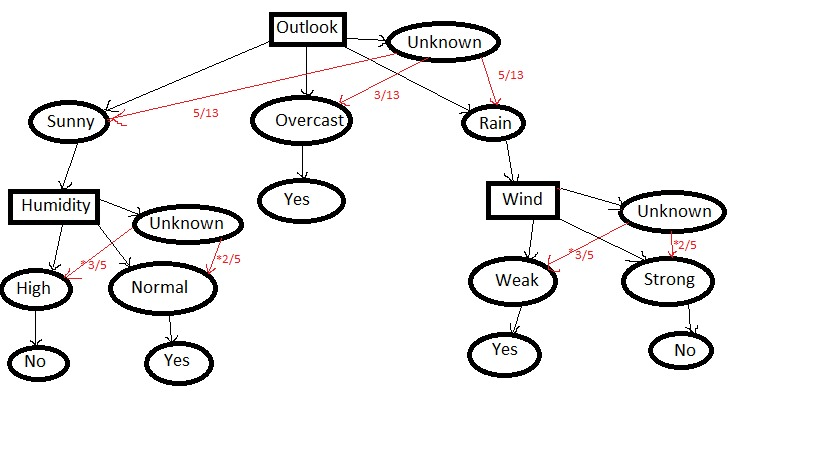
In the end Yes or No which ever will be having the larger value. We will choose that our class.


# ANS -: 2 (a) Code for the implementation of decision tree


In [1]:
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
import pandas as pd
import random

In [2]:
# calculation of the mean squared error
def accuracy_mse(actual, predicted):
    mse = 0.0  
    actual1 = list(map(int, actual))
    predi1 = list(map(int, predicted))
    for i in range(len(actual)):
         mse = mse + ((actual1[i] - predi1[i])**2)   
    return mse/len(actual)

In [3]:
# calculation of the accuracy matrix
def accuracy_metric(actual, predicted):
    true_tag = 0  # number of predication that has been done true
    false_tag = 0 # number of prediction that has been done false
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            true_tag += 1
        else:
            false_tag += 1
    return true_tag / float(len(actual)) * 100.0

# method for 70 - 30 split

In [4]:
# Evaluate an algorithm using a cross validation split
def algorithm_70_30(dataset, algorithm, n_folds, *args):
    #split the data in k folds
    #data = random.(dataset
    data = dataset
    dataset_split = list()  #list to store all the k folds 
    dataset_copy = list(data)
    train_size = ((len(data)*70)/100)  #size of the training data
    test_size  = ((len(data)*30)/100)  #size of the test data
    print(len(dataset_copy))
    for i in range(0,2):
        fold = list()
        while len(fold) < train_size and i==0:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        while len(fold) < test_size and i==1:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    print(len(dataset_split))
    print(len(dataset_split[0]))
    print(len(dataset_split[1]))
    scores = list()
    k=10
    if k==10:
        train_set = dataset_split[0]
        test_set = dataset_split[1]
        print(len(train_set)," ",len(test_set))
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        print(predicted)
        print(actual)
        scores.append(accuracy)
    return scores

In [5]:
# methode for regression
def algorithm_regression(dataset, algorithm, n_folds, *args):
    #split the data in k folds
    data = dataset
    n_f = n_folds
    dataset_split = list()  #list to store all the k folds 
    dataset_copy = list(data) 
    fold_size = int(len(data) / n_f)  #size of each fold
    for i in range(0,n_f):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    folds = dataset_split

    scores = list()   
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)  
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# method for k fold cross validation model

In [6]:
# Evaluate an algorithm using a cross validation split
def algorithm_kfold(dataset, algorithm, n_folds, *args):
    #split the data in k folds
    data = dataset
    n_f = n_folds
    dataset_split = list()  #list to store all the k folds 
    dataset_copy = list(data) 
    fold_size = int(len(data) / n_f)  #size of each fold
    for i in range(0,n_f):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    folds = dataset_split

    scores = list()   
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)  
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [7]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
    root = get_split(train)                            #assigning the root node in the tree
    split(root, max_depth, min_size, 1)
    tree = root
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return(predictions)

# Ans 2(b) model for 70-30 using depth 7 and leaf size 11

In [8]:
# main method in the code
seed(1)
filename = './convertcsv.csv'
file = open(filename, "rt")  # opening the csv file
li = reader(file)
dataset = list(li)
n_folds = 1
max_depth = 7
min_size = 11
#print(len(list(dataset)))
scores = algorithm_70_30(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

150
2
105
45
105   45
['setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor']
['setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa'

# ANS 2(c)  Hyperparameter tunning (find optimal depth of the decision tree)

-> Here I will use 5 fold cross validation to find out the optimal depth of my decision tree

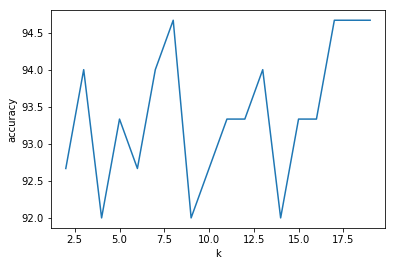

maximum accuracy 94.66666666666667  is at depth 17


In [9]:
seed(1)
filename = './convertcsv.csv'
file = open(filename, "rt")  # opening the csv file
li = reader(file)
dataset = list(li)
x = list()
n_folds = 5
min_size = 8
max_acc = 0
optimal_depth = 0
k = list(range(2,20))
for depth in range(2,20):
        max_depth = depth
        scores = algorithm_kfold(dataset, decision_tree, n_folds, max_depth, min_size)
       # print('Scores: %s' % scores) 
        #print('Mean Accuracy: %.2f%%' % (sum(scores)/float(len(scores))))
        x.append((sum(scores)/float(len(scores))))
        if(max_acc < (sum(scores)/float(len(scores)))):
            max_acc = (sum(scores)/float(len(scores)))
            optimal_depth = max_depth
plt.plot(k, x) 
plt.xlabel('k') 
plt.ylabel('accuracy')   
plt.show() 
print("maximum accuracy",max_acc," is at depth",optimal_depth)

-> During 5-fold cross validation we are getting a maximum accuracy at depth 17

# Ans - 3 Decision tree for regression using real state data

In [10]:
# decision tree for real estate data using my own model
seed(1)
filename = './convertcsv(1).csv'     #importing the real_estate data
file = open(filename, "rt")  # opening the csv file
li = reader(file)
dataset = list(li)
n_folds = 2
max_depth = 7
min_size = 11
#print(dataset)
scores = algorithm_regression(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [0.4830917874396135, 0.4830917874396135]
Mean Accuracy: 0.483%


-> As we are using classification over a regression problem so we are getting a very bad accuracy. We have to calculate either mean absolute error or mean squre error for the regression problem.

In [11]:
# decision tree using predefined library sklearn over real estate data
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

clf1 = DecisionTreeRegressor(max_depth=2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = pd.read_csv('./real_state.csv')

print("max:",max(iris['Y house price of unit area']))
print("min:",min(iris['Y house price of unit area']))

d = iris.drop("Y house price of unit area" ,axis=1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(d,iris['Y house price of unit area'] , test_size=0.3)
clf1 = clf1.fit(x_train1,y_train1)
prediction = clf1.predict(x_test1)

acc = mean_squared_error(y_test1, prediction,  sample_weight=None)
print("Mean squared error over the regression:",acc)

max: 117.5
min: 7.6
Mean squared error over the regression: 99.23696036589463


# Ans -4 Decision tree using sklearn

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = pd.read_csv('./iris.csv')
print(iris.head())
d = iris.drop("species" ,axis=1)
x_train, x_test, y_train, y_test = train_test_split(d,iris['species'] , test_size=0.3)
print(x_train.shape)
clf = tree.DecisionTreeClassifier(max_depth = 17,min_samples_leaf=11)
clf = clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
acc = accuracy_score(y_test, prediction, normalize=True, sample_weight=None)
print(acc)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(105, 4)
0.9777777777777777


# Comparsion b/w the model using sklearn and my own model

-> We are getting almost same accuracy using sklearn and my own model.
-> In my own model, we are getting maximum accuracy at depth 17 and in sklearn model i am getting an accuracy of 95.56% over this depth
-> So we can say that both the model are working almost same. (It was trivial as we are using accuracy_score for calculating the accuracy in both model)

# Ans 5 -> Visualization of the decision tree for the iris dataset and real estate    dataset.

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


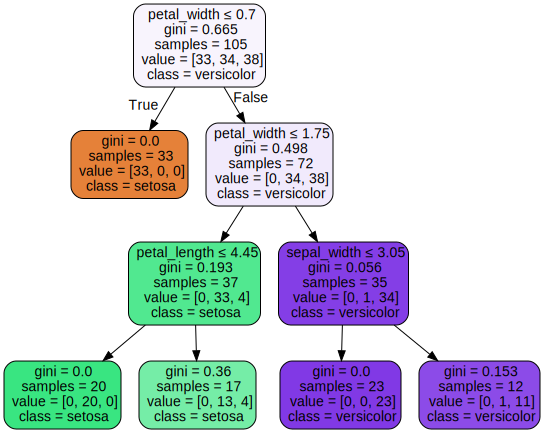

In [13]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
print(list(x_train))
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=list(x_train),  
                      class_names=list(y_train),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


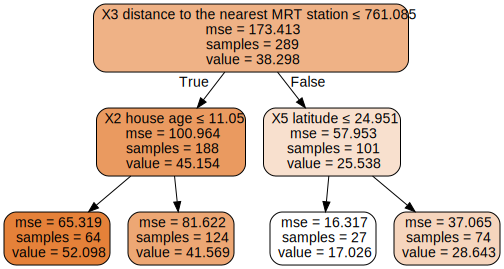

In [14]:
import graphviz 
dot_data = tree.export_graphviz(clf1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("real_estate")
print(list(x_train1))
dot_data = tree.export_graphviz(clf1, out_file=None, 
                      feature_names=list(x_train1),  
                      class_names=list(y_train1),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

-> From the first tree we can say that versicolor is the class that is having the highest gini index so we are using it as root node.
-> As first problem is a classification problem so we are using gini as a parameter to split the node and in the second tree, It is a regression tree so we are using the mean squared error to split the node.
-> Depth of the classification tree over iris dataset is 3 while for regression problem it is 2.

# Ans - 6 Performance of best model vs worst model

In [15]:
seed(1)
filename = './convertcsv.csv'
file = open(filename, "rt")  # opening the csv file
li = reader(file)
dataset = list(li)

In [16]:
# method to devide the data in train and test    
data = dataset
dataset_split = list()  #list to store all the k folds 
dataset_copy = list(data)
train_size = ((len(data)*70)/100)  #size of the training data
test_size  = ((len(data)*30)/100)  #size of the test data
#print(len(dataset_copy))
for i in range(0,2):
    fold = list()
    while len(fold) < train_size and i==0:
        index = randrange(len(dataset_copy))
        fold.append(dataset_copy.pop(index))
    while len(fold) < test_size and i==1:
        index = randrange(len(dataset_copy))
        fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
train_data = dataset_split[0]
test_data  = dataset_split[1]

In [17]:
# Code to find out the training error on the 70% data for iris dataset
def algorithm_training(dataset, algorithm, n_folds, *args):   
        train_set = list(dataset)  
        test_set = list(dataset)
        predicted = algorithm(train_set, train_set, *args)
        actual = [row[-1] for row in train_set]
        accuracy = accuracy_metric(actual, predicted)
        #scores.append(accuracy)
        return accuracy

In [18]:
def algorithm_testing(dataset1,dataset2,algorithm, n_folds, *args):   
        train_set = list(dataset1)  
        test_set = list(dataset2)
        predicted = algorithm(train_set, train_set, *args)
        actual = [row[-1] for row in train_set]
        accuracy = accuracy_metric(actual, predicted)
        #scores.append(accuracy)
        return accuracy

In [296]:
max_acc = 0
min_acc = 100
worst_depth = 0
for depth in range(1,15):
        max_depth = depth
        scores = algorithm_training(train_data, decision_tree, n_folds, max_depth, min_size)
        if(max_acc < scores):
            max_acc = scores
            optimal_depth = max_depth
        if(min_acc >scores):
            min_acc = scores
            worst_depth = max_depth
print("worst and best accuracy on the training set")
print("max accuracy:",max_acc,"optimal depth:",optimal_depth)
print("min accuracy:",min_acc,"worst depth:",worst_depth)           

worst and best accuracy on the training set
max accuracy: 96.19047619047619 optimal depth: 4
min accuracy: 66.66666666666666 worst depth: 1


In [301]:
# using the best parameter that were giving the max accuracy on the training set
max_depth = 4
scores = algorithm_testing(train_data,test_data, decision_tree, n_folds, max_depth, min_size)
print("Test accuracy on highest training accuracy parameters:",score)

Test accuracy on highest training accuracy parameters: 97.6604476


In [302]:
# using the worst parameter that were giving the max accuracy on the training set
max_depth = 1  # as we are using worst accuracy for the dataset
scores = algorithm_testing(train_data,test_data, decision_tree, n_folds, max_depth, min_size)
print("Test accuracy on lowest training accuracy parameters:",score)

Test accuracy on lowest training accuracy parameters: 69.8343440545555


-> When we are using train data for training as well as testing we are getting max accuracy 96.1904%. It is not 100% so we can say that we are not overfitting in our model. At the same time when we are getting min accuracy of 66.67.
-> Our optimal depth is 4 and worst case depth is 1
-> On optimal depth we are getting an accuracy of 97.66% on the test data or unseen data.
-> On optimal depth we are getting an accuracy of 69.83% on the test data or unseen data.

# Ans- 7

In [19]:
import pandas as pd
seed(1)
dataset1 = pd.read_csv('./haberman.csv')
print(dataset1.head(5))

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


In [277]:
import time
time1 = []
f1 = .05
train_time = []
test_time = []
data_size = []
for f in range (0,20):
    d1 = dataset1.sample(frac = f1)
    data_size.append(f1)
    d1 = dataset1.drop("1.1",axis=1)
    t1 = time.time()
    x_train, x_test, y_train, y_test = train_test_split(d1,dataset1['1.1'] , test_size=0.3)
    c = tree.DecisionTreeClassifier()
    c = c.fit(x_train,y_train)
    t2 = time.time()
    train_time.append(t2-t1)
    t1 = time.time()
    prediction = c.predict(x_test)
    a = accuracy_score(y_test, prediction, normalize=True, sample_weight=None)
    t2 = time.time()
    test_time.append(t2-t1)
    f1 = f1 + .05

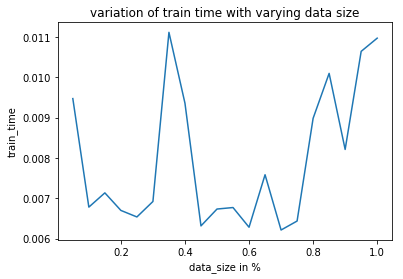

In [278]:
plt.plot(data_size, train_time) 
plt.xlabel('data_size in %') 
plt.ylabel('train_time') 
plt.title("variation of train time with varying data size")
plt.show()   

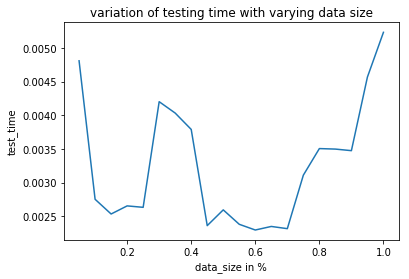

In [279]:
plt.plot(data_size, test_time) 
plt.xlabel('data_size in %') 
plt.ylabel('test_time') 
plt.title("variation of testing time with varying data size")
plt.show() 

-> If in a decision tree there are k number of features and depth of the tree is d. If there are total N datapoints in my training set then in best case there will be O(log(N)) depth.This means that the worst case of depth being in O(N) is possible - basically when each split simply splits data in 1 and n-1 examples.
-> So time complexity = O(NKd) or we can say that it's time complexity when tree size is O(logN) is O(Klog(N)d)
-> From the graph we can see that on increasing the train size training time is not increasing linearly or exponential. It is because in between the training my tree may be sometime balance and sometimes imbalance. So it's depth vary between O(N) and O(log N).
-> We can see in the graph when the training time of the model is more then test time is also high. 

References -> # https://stackoverflow.com/questions/22827806/python-select-random-values-for-a-column-from-csv
           ->   www.machinelearningmastery.com and www.kaggle.com
           ->   andrew ng course 